# Analyzing Our Sentiment Scores

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
# Importing the CSV files
bert_data = pd.read_csv('bert_combined.csv')
mistral_data = pd.read_csv('mistral_combined.csv')

# Displaying the first few rows of each dataset
print("BERT Data:")
print(bert_data.head())

print("\nMistral Data:")
print(mistral_data.head())

BERT Data:
         Date  arabnews      cnbc        ei        ft      mees  oilprice
0  2021-01-04  0.519839  0.000000  0.889924 -0.569241  0.000000  0.000000
1  2021-01-05  0.519839  0.000000  0.889924 -0.560321  0.000000 -0.526396
2  2021-01-06  0.519839  0.000000  0.889924 -0.654790  0.000000 -0.526396
3  2021-01-07  0.519839  0.848916  0.889924  0.644426  0.000000  0.000000
4  2021-01-08  0.519839  0.848916  0.889924  0.764327 -0.626426  0.711697

Mistral Data:
         Date  arabnews  cnbc   ei   ft  mees  oilprice  opec
0  2021-01-04       0.4   0.0  0.5 -0.5   0.4       0.4   0.0
1  2021-01-05       0.4   0.4  0.5  0.5   0.4       0.7   0.4
2  2021-01-06       0.4   0.4  0.5 -0.5   0.4       0.7   0.4
3  2021-01-07       0.4   0.7  0.5  0.5   0.4       0.5   0.4
4  2021-01-08       0.4   0.7  0.5  0.4  -0.5       0.5   0.4


In [19]:
merged_data = pd.merge(bert_data, mistral_data, on='Date', suffixes=('_bert', '_mistral'))

# Select columns for correlation (matching news sources)
news_sources = ['arabnews', 'cnbc', 'ei', 'ft', 'mees', 'oilprice']  # Matching sources
correlation_data = merged_data[[f"{source}_bert" for source in news_sources] + 
                               [f"{source}_mistral" for source in news_sources]]

correlation_data

,arabnews_bert,cnbc_bert,ei_bert,ft_bert,mees_bert,oilprice_bert,arabnews_mistral,cnbc_mistral,ei_mistral,ft_mistral,mees_mistral,oilprice_mistral
0,0.519839,0.000000,0.889924,-0.569241,0.000000,0.000000,0.4,0.0,0.5,-0.5,0.4,0.4
1,0.519839,0.000000,0.889924,-0.560321,0.000000,-0.526396,0.4,0.4,0.5,0.5,0.4,0.7
2,0.519839,0.000000,0.889924,-0.654790,0.000000,-0.526396,0.4,0.4,0.5,-0.5,0.4,0.7
3,0.519839,0.848916,0.889924,0.644426,0.000000,0.000000,0.4,0.7,0.5,0.5,0.4,0.5
4,0.519839,0.848916,0.889924,0.764327,-0.626426,0.711697,0.4,0.7,0.5,0.4,-0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1371,0.000000,0.652695,0.000000,0.000000,0.000000,-0.788622,0.0,0.0,0.4,0.0,-0.3,0.6
1372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.5,0.6,0.6,-0.3,0.7
1373,0.586104,0.000000,-0.603633,-0.496074,0.000000,0.000000,0.0,-0.3,-0.3,-0.5,-0.3,0.7
1374,0.586104,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.3,-0.3,0.4,-0.3,-0.5


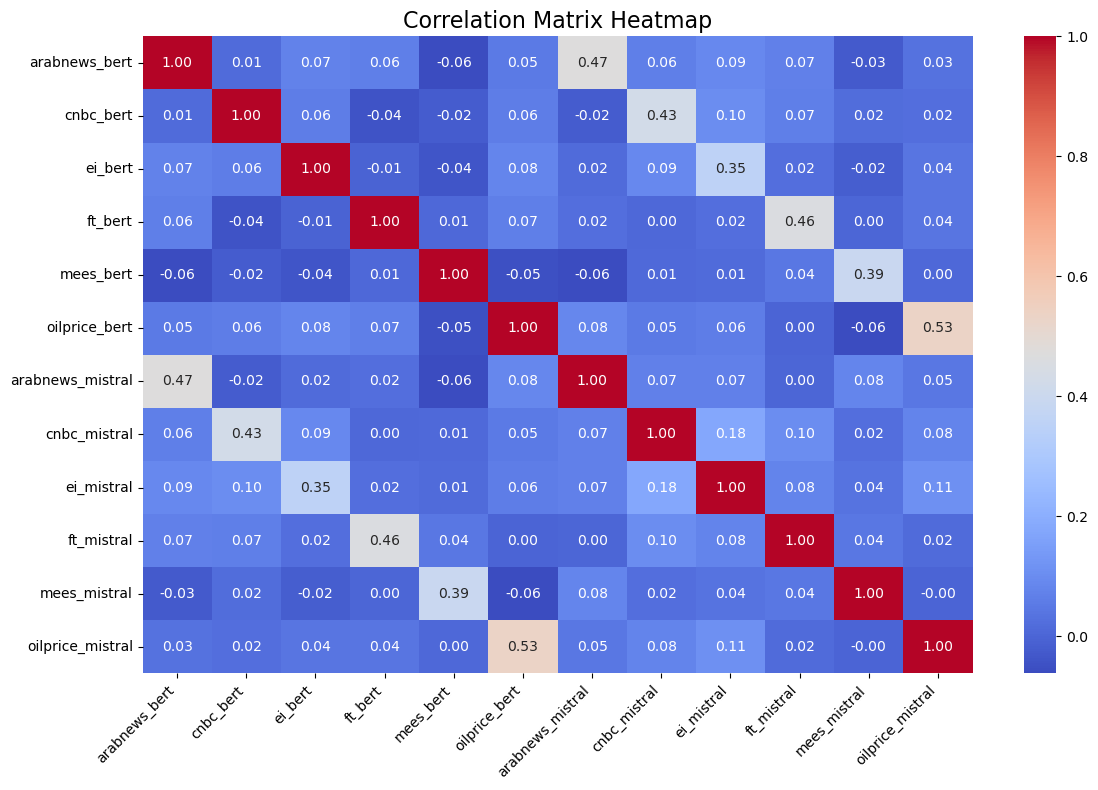

In [20]:

correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add titles and labels
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Show the heatmap
plt.tight_layout()
plt.show()


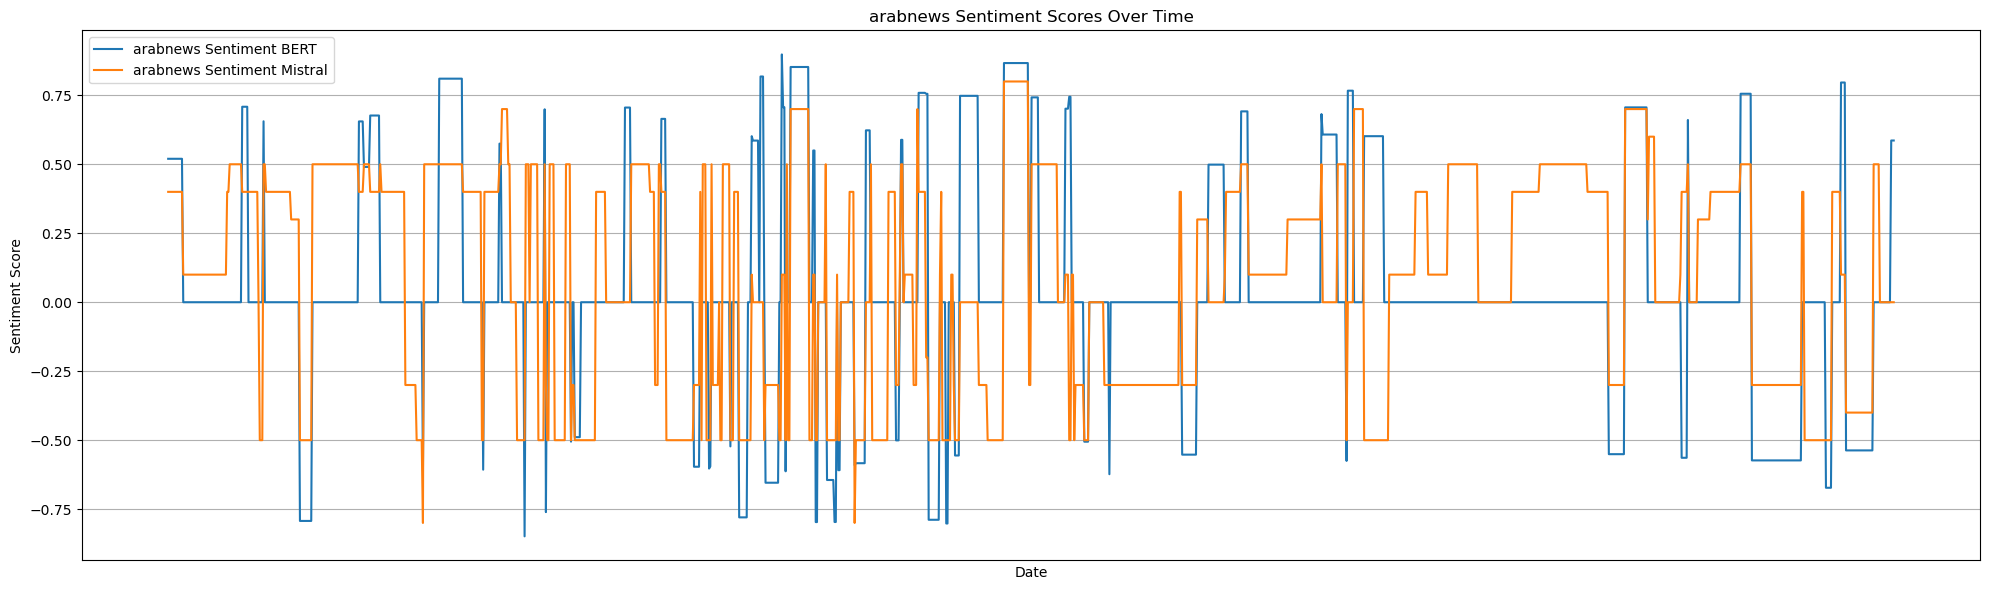

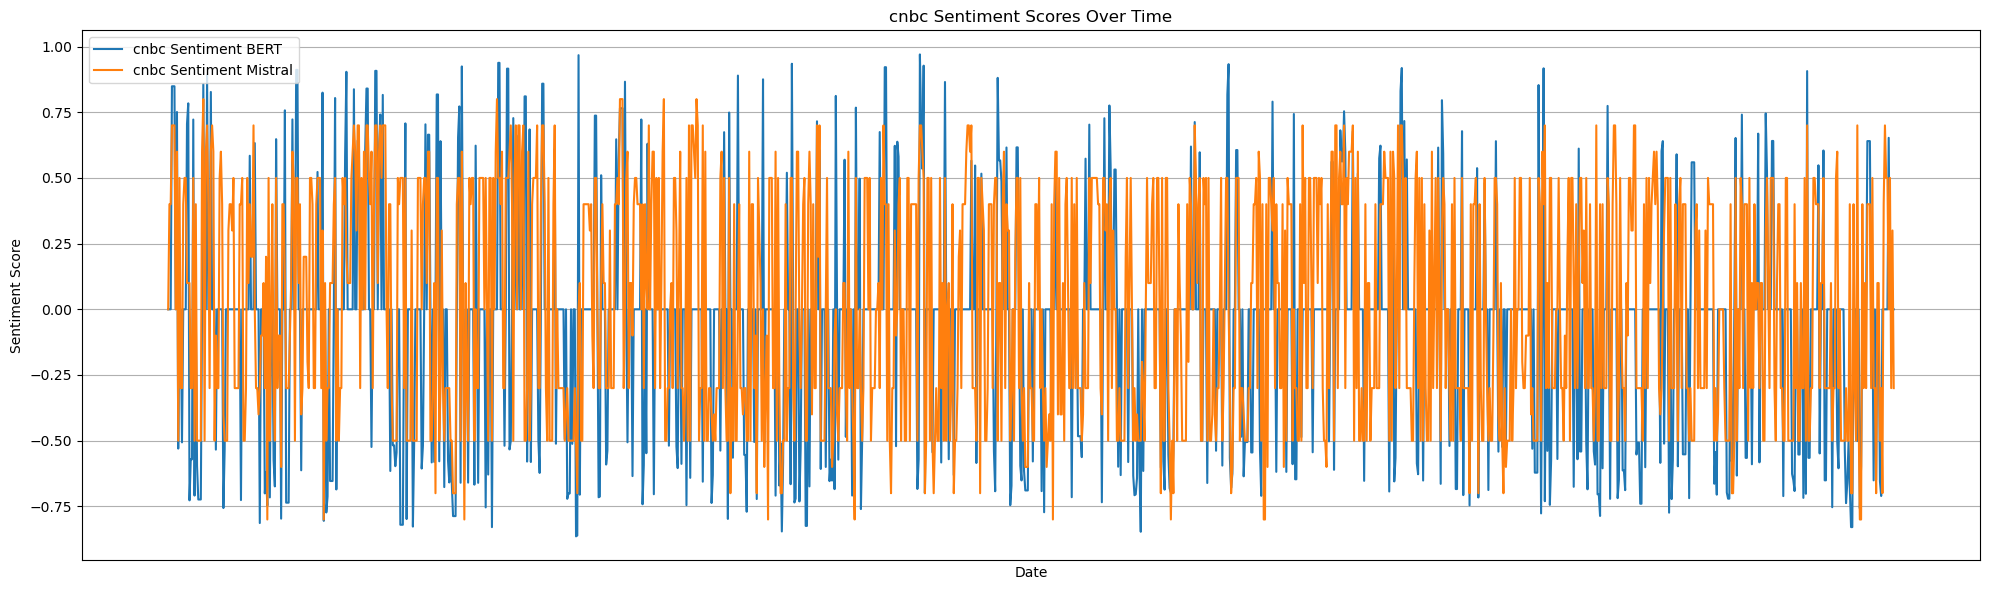

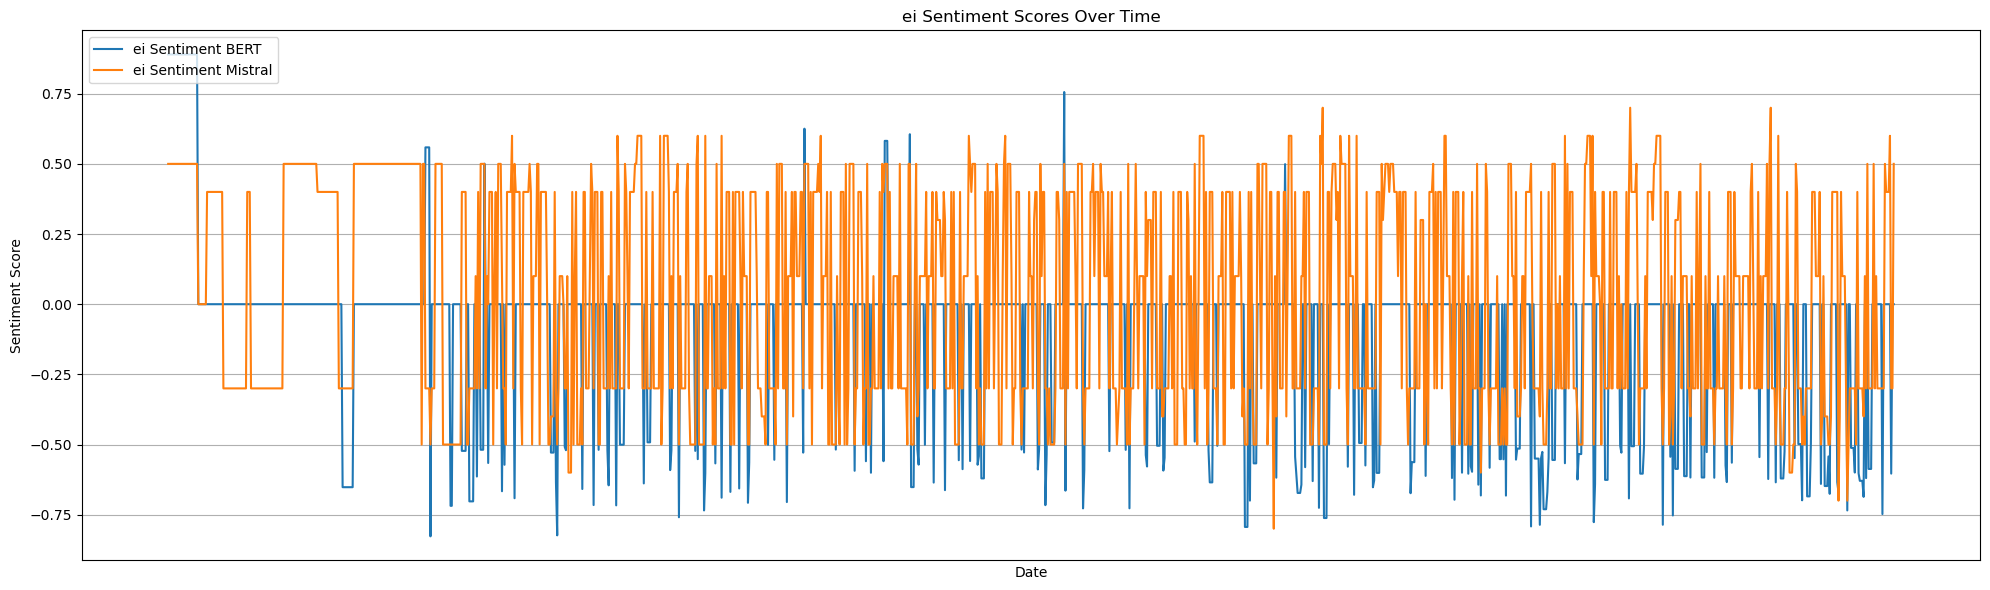

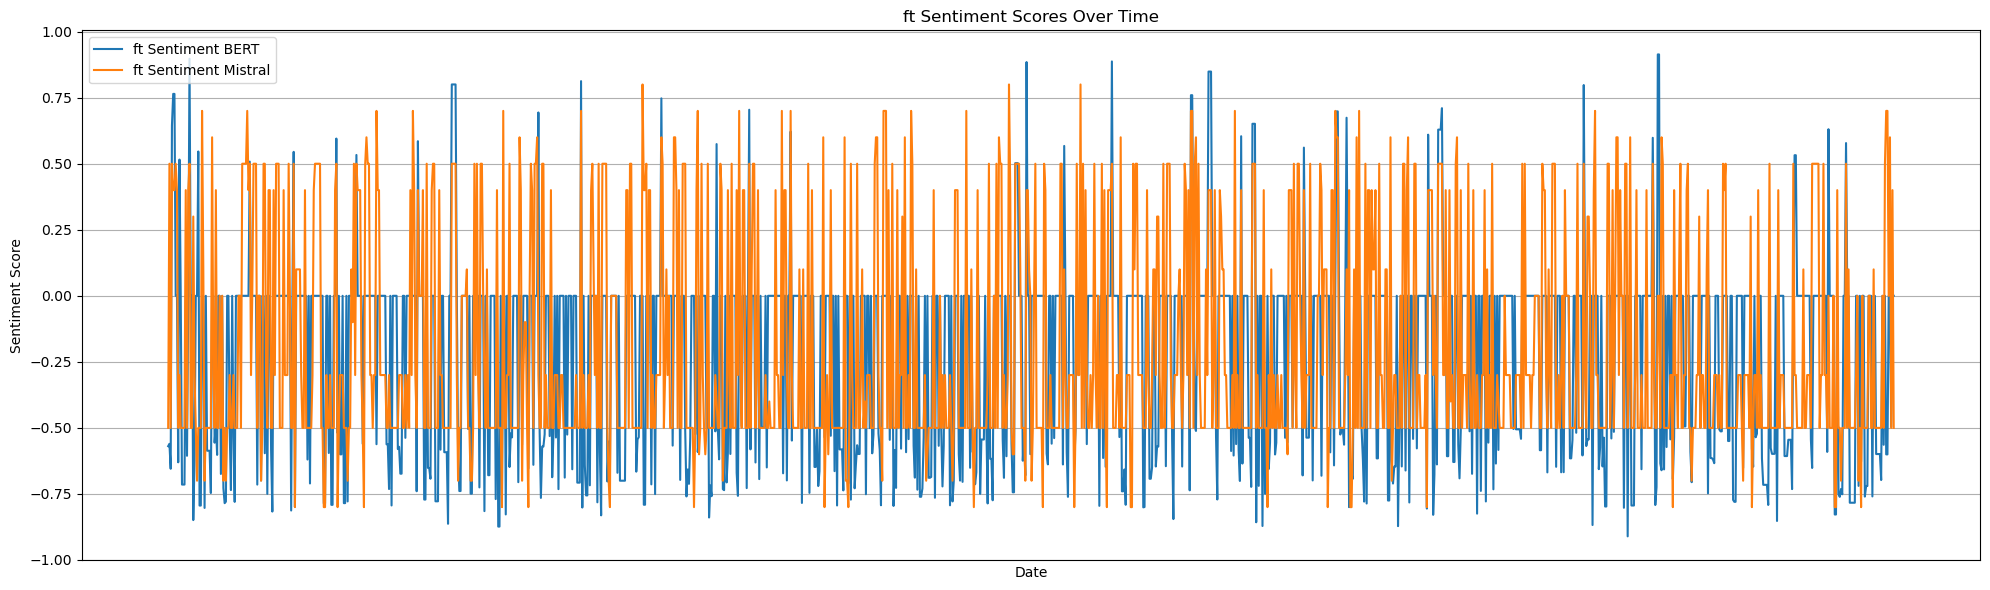

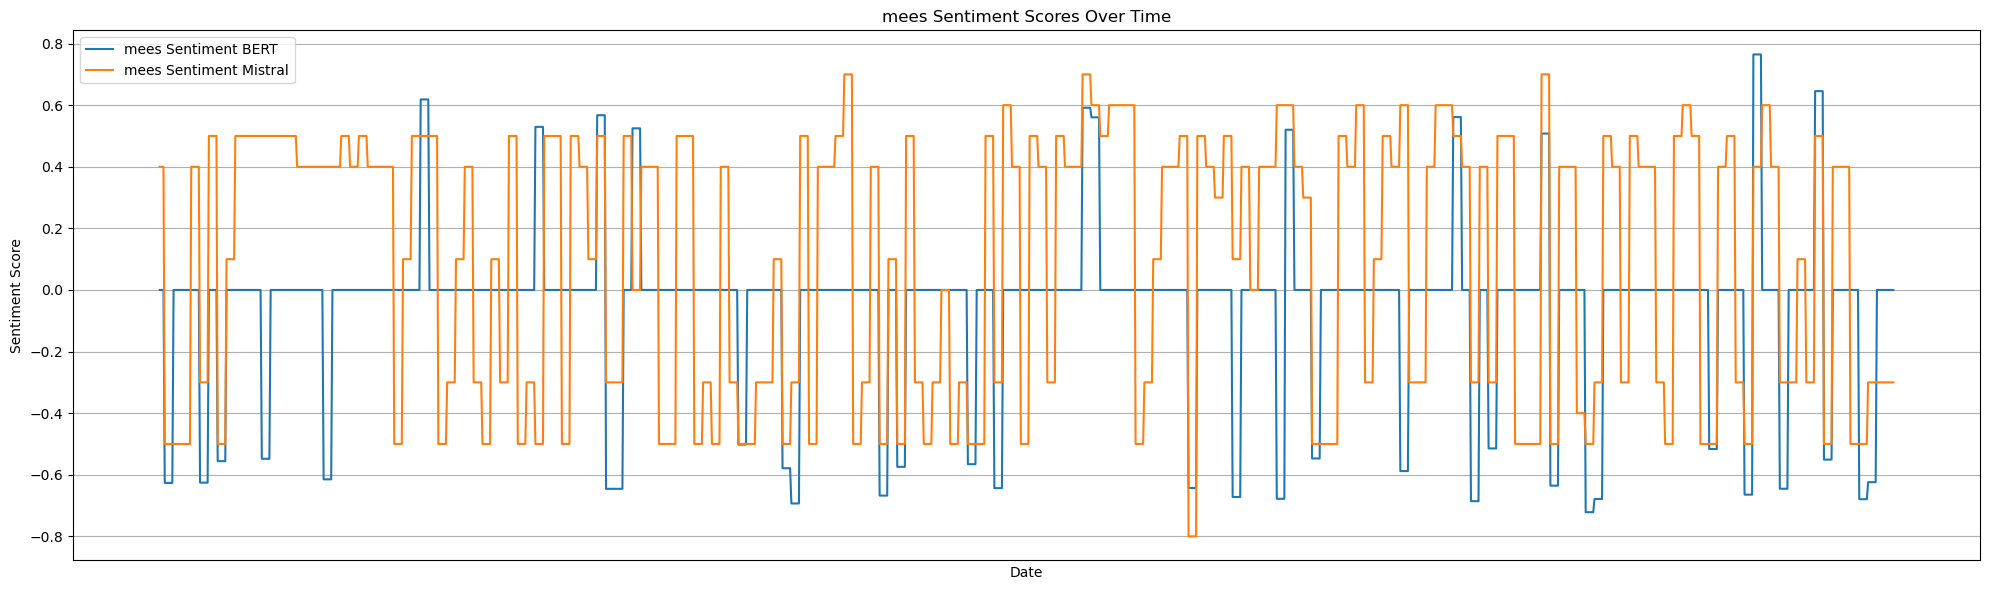

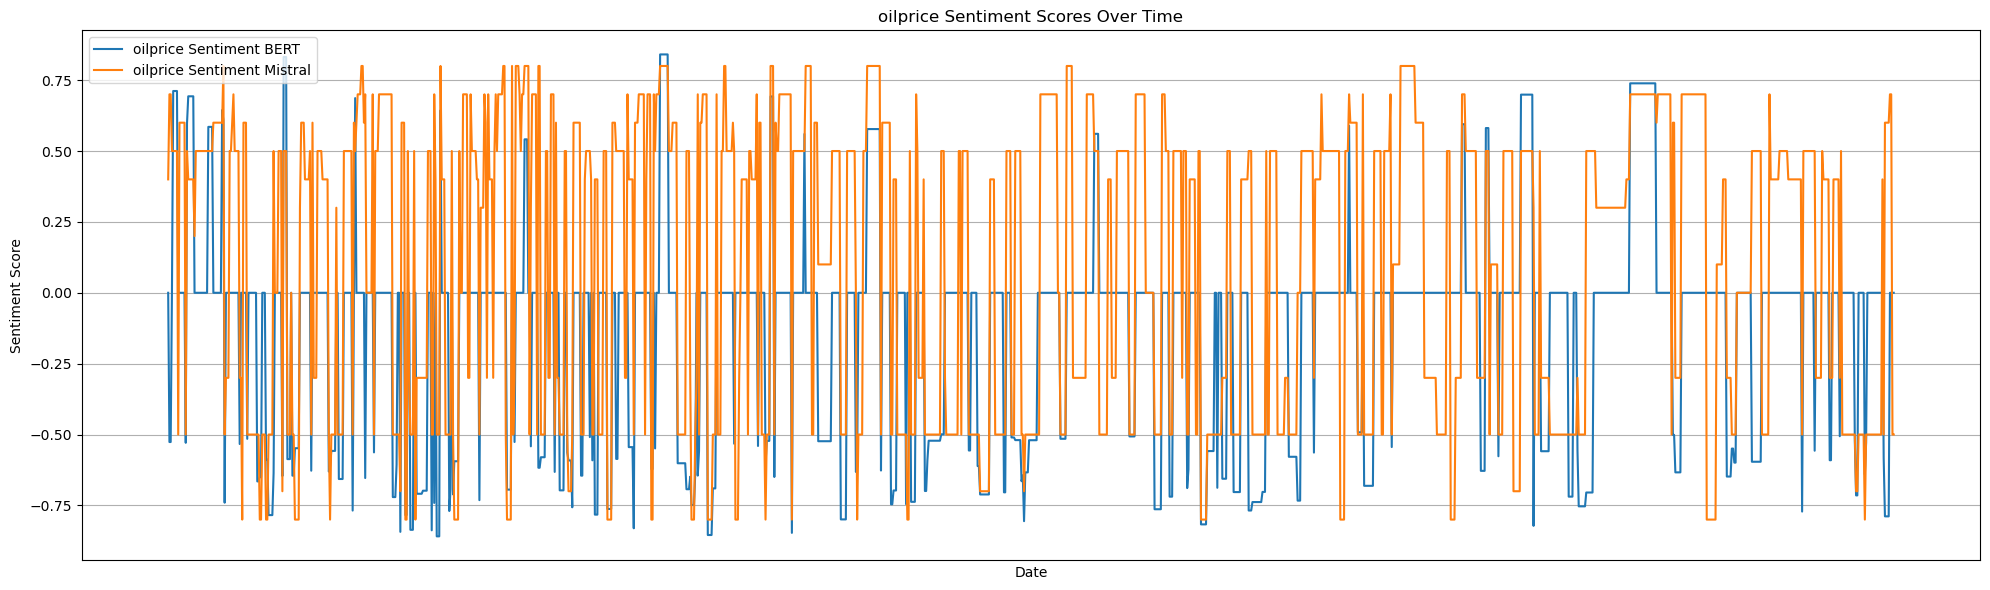

In [26]:
# List of news sources
news_sources = ['arabnews', 'cnbc', 'ei', 'ft', 'mees', 'oilprice']

# Plot for each news source
for source in news_sources:
    plt.figure(figsize=(20, 6))
    
    # Plot BERT and Mistral sentiment scores for the current news source
    plt.plot(bert_data['Date'], bert_data[source], label=f"{source} Sentiment BERT")
    plt.plot(mistral_data['Date'], mistral_data[source], label=f"{source} Sentiment Mistral")
    
    # Customize the plot
    plt.xlabel("Date")
    plt.ylabel("Sentiment Score")
    plt.title(f"{source} Sentiment Scores Over Time")
    plt.legend(loc="upper left")
    
    # Hide x-axis tick labels
    plt.xticks([])
    
    plt.tight_layout()  # Adjust layout to fit everything
    plt.grid(True)
    plt.show()


In [29]:
from scipy.stats import spearmanr, pearsonr

# Create a DataFrame to store the correlations
correlation_results = []

for source in news_sources:
    # Calculate Pearson and Spearman correlations
    pearson_corr, _ = pearsonr(merged_data[f"{source}_bert"], merged_data[f"{source}_mistral"])
    spearman_corr, _ = spearmanr(merged_data[f"{source}_bert"], merged_data[f"{source}_mistral"])
    
    # Append results to the list
    correlation_results.append({
        'News Source': source,
        'Pearson Correlation': pearson_corr,
        'Spearman Correlation': spearman_corr
    })

# Convert to a DataFrame for better presentation
correlation_df = pd.DataFrame(correlation_results)

correlation_df

,News Source,Pearson Correlation,Spearman Correlation
0,arabnews,0.471860,0.449267
1,cnbc,0.425649,0.428464
2,ei,0.354481,0.364766
3,ft,0.458290,0.489785
4,mees,0.390938,0.371896
5,oilprice,0.534438,0.529377


Generally, Mistral outputted more positive sentiments compared to BERT. This is especially clear in the financial times and energy intel scores, as Mistral's sentiment scores were generally higher than those of BERT. 

# Analyzing text to see why the sentiment scores differed

In [32]:

# Create a dictionary to store results
largest_differences = {}

for source in news_sources:
    # Calculate the absolute difference between BERT and Mistral scores
    merged_data[f"{source}_diff"] = abs(merged_data[f"{source}_bert"] - merged_data[f"{source}_mistral"])
    
    # Sort by the difference and select the top 3 dates
    top_differences = merged_data[['Date', f"{source}_diff"]].sort_values(by=f"{source}_diff", ascending=False).head(3)
    
    # Store the results for the current news source
    largest_differences[source] = top_differences

# Combine results into a single DataFrame for better visualization
output_data = pd.concat(largest_differences, names=['News Source', 'Index'])

output_data


Date  arabnews_diff  cnbc_diff   ei_diff   ft_diff  \
News Source Index                                                             
arabnews    718    2022-12-23       1.244586        NaN       NaN       NaN   
            719    2022-12-24       1.244586        NaN       NaN       NaN   
            953    2023-08-15       1.101776        NaN       NaN       NaN   
cnbc        1097   2024-01-06            NaN   1.430377       NaN       NaN   
            661    2022-10-27            NaN   1.380914       NaN       NaN   
            426    2022-03-06            NaN   1.356079       NaN       NaN   
ei          1086   2023-12-26            NaN        NaN  1.291811       NaN   
            441    2022-03-21            NaN        NaN  1.289504       NaN   
            428    2022-03-08            NaN        NaN  1.201815       NaN   
ft          1370   2024-10-05            NaN        NaN       NaN  1.300302   
            1369   2024-10-04            NaN        NaN       NaN  1.300302   
            422    2022-03-02            NaN        NaN       NaN  1.291456   
mees        886    2023-06-09            NaN        NaN       NaN       NaN   
            887    2023-06-10            NaN        NaN       NaN       NaN   
            888    2023-06-11            NaN        NaN       NaN       NaN   
oilprice    212    2021-08-04            NaN        NaN       NaN       NaN   
            296    2021-10-27            NaN        NaN       NaN       NaN   
            295    2021-10-26            NaN        NaN       NaN       NaN   

                   mees_diff  oilprice_diff  
News Source Index                            
arabnews    718          NaN            NaN  
            719          NaN            NaN  
            953          NaN            NaN  
cnbc        1097         NaN            NaN  
            661          NaN            NaN  
            426          NaN            NaN  
ei          1086         NaN            NaN  
            441          NaN            NaN  
            428          NaN            NaN  
ft          1370         NaN            NaN  
            1369         NaN            NaN  
            422          NaN            NaN  
mees        886     1.278053            NaN  
            887     1.278053            NaN  
            888     1.278053            NaN  
oilprice    212          NaN       1.441283  
            296          NaN       1.417152  
            295          NaN       1.417152

In [ ]:
# Specify the indexes to extract
indexes = [718, 719, 953]

# Extract the rows for the specified indexes
arabnews_scores = merged_data.loc[indexes, ['Date', 'arabnews_bert', 'arabnews_mistral']]


In [35]:
# Import
text_df = pd.read_csv('combined_final_dataset.csv')

# Displaying the first few rows of each dataset
text_df

,Date,arabnews,cnbc,ei,ft,mees,oilprice,opec
0,2021-01-04,WEEKLY ENERGY RECAP: Oil prices on an upward m...,Shares of Chinese telecom giants surge followi...,Schlumberger Optimistic for 2021 Recovery,Saudi Arabia warns oil producers over fragile ...,Opec Aims For More Stable 2021. US Mideast Cru...,Oil Rises As Market Awaits OPEC+ Production De...,The 13th OPEC and non-OPEC Ministerial Meeting...
1,2021-01-05,WEEKLY ENERGY RECAP: Oil prices on an upward m...,Oil prices will remain flat until mid-2021: JB...,Schlumberger Optimistic for 2021 Recovery,Saudis pledge to cut oil output despite Russia...,Opec Aims For More Stable 2021. US Mideast Cru...,OPEC+ Meeting Ends With Major Surprise Cut Fro...,13th OPEC and non-OPEC Ministerial Meeting con...
2,2021-01-06,WEEKLY ENERGY RECAP: Oil prices on an upward m...,Oil rises as supply constraints retain focus a...,Schlumberger Optimistic for 2021 Recovery,Oil auction in Arctic wildlife refuge draws sc...,Opec Aims For More Stable 2021. US Mideast Cru...,OPEC+ Meeting Ends With Major Surprise Cut Fro...,13th OPEC and non-OPEC Ministerial Meeting con...
3,2021-01-07,WEEKLY ENERGY RECAP: Oil prices on an upward m...,"Oil hits highest level since February, posts n...",Schlumberger Optimistic for 2021 Recovery,A Democratic Senate provides a surge for Biden...,Opec Aims For More Stable 2021. US Mideast Cru...,The Next 5 Days Could See A Buying Spree In Oi...,13th OPEC and non-OPEC Ministerial Meeting con...
4,2021-01-08,WEEKLY ENERGY RECAP: Oil prices on an upward m...,"Oil hits highest level since February, posts n...",Schlumberger Optimistic for 2021 Recovery,UK’s FTSE 100 kicks off 2021 with 6% rally lif...,Algeria’s Gas Exports Slump To 25-Year Low For...,Oil Rally Continues Despite Slow Vaccine Rollout,13th OPEC and non-OPEC Ministerial Meeting con...
...,...,...,...,...,...,...,...,...
1371,2024-10-06,Oman credit rating rises to ‘BBB-’ from ‘BB+’:...,Oil pares gains after strongest weekly rise in...,US Rig Count Enters Fourth Quarter in Decline....,TotalEnergies considers foray into copper trad...,Compliance In Spotlight At Opec JMMC Meeting,Oil Explodes 4% Amid Talk of Israel Attacking ...,56th Meeting of the Joint Ministerial Monitori...
1372,2024-10-07,Oman credit rating rises to ‘BBB-’ from ‘BB+’:...,Oil edges lower after rallying to highest in o...,Aramco Hikes November Prices for Asia Crude Ex...,Oil surges above $80 as conflict and storm spa...,Compliance In Spotlight At Opec JMMC Meeting,Historic Short Squeeze Sends Oil Prices Higher,56th Meeting of the Joint Ministerial Monitori...
1373,2024-10-08,"Pakistan’s stock market surpasses historic 85,...",Oil prices steady after sliding on potential I...,Demand Concerns Outweigh Mideast Turmoil in EI...,Chevron in talks to sell Texas gas assets to T...,Compliance In Spotlight At Opec JMMC Meeting,Historic Short Squeeze Sends Oil Prices Higher,56th Meeting of the Joint Ministerial Monitori...
1374,2024-10-09,"Pakistan’s stock market surpasses historic 85,...",Oil prices rise more than 3% on Israel-Iran co...,"Oil Prices Dip Amid Demand, Risk Crosscurrents...",Who and what is driving oil price volatility. ...,Compliance In Spotlight At Opec JMMC Meeting,Wild Oil Price Forecasts: Some Predict $350 if...,56th Meeting of the Joint Ministerial Monitori...


In [40]:
# Extract the rows for the specified indexes
pd.set_option('display.max_colwidth', None)
arabnews_text = text_df.loc[indexes, ['Date', 'arabnews']]

arabnews_text

,Date,arabnews
718,2022-12-23,World’s new hope in climate battle
719,2022-12-24,World’s new hope in climate battle
953,2023-08-15,"Dollar appreciates by Rs3 in interbank market after Dar’s departure, amid rise in demand"


In [43]:
arabnews_scores

,Date,arabnews_bert,arabnews_mistral
718,2022-12-23,0.744586,-0.5
719,2022-12-24,0.744586,-0.5
953,2023-08-15,0.601776,-0.5


In [45]:
# Specify the indexes to extract
indexes = [1097, 661, 426]

# Extract the rows for the specified indexes
cnbc_scores = merged_data.loc[indexes, ['Date', 'cnbc_bert', 'cnbc_mistral']]
cnbc_scores

,Date,cnbc_bert,cnbc_mistral
1097,2024-01-06,-0.730377,0.7
661,2022-10-27,0.880914,-0.5
426,2022-03-06,-0.656079,0.7


In [46]:
cnbc_text = text_df.loc[indexes, ['Date', 'cnbc']]
cnbc_text

,Date,cnbc
1097,2024-01-06,"Oil prices could spike 20%, possibly double if Middle East conflict disrupts Strait of Hormuz"
661,2022-10-27,Oil futures ease 1% as China widens COVID curbs. We’re pleased to see Pioneer return cash to shareholders despite oil market volatility
426,2022-03-06,"Stephen Roach says Russian default would hit emerging markets — and China. War fallout: U.S. economy to slow, Europe risks recession and Russia to suffer double-digit decline. U.S. crude oil spikes to 13-year high of $130 overnight, then gives up most of .... Hong Kong’s Hang Seng drops nearly 4% as Asia-Pacific stocks slip; oil prices surge on .... Dow drops nearly 800 points as market turmoil continues from Russia-Ukraine war, inflation fears. How to know when oil prices will cause a recession, and what to invest in. National average for a gallon of gas tops $4, the highest price at the pump .... Oil and gas prices are surging — Here’s what that means for renewable energy stocks. How the price of crude oil can trigger a recession. Shell defends decision to buy discounted oil from Russia"


In [47]:
# Specify the indexes to extract
indexes = [1086, 441, 428]

# Extract the rows for the specified indexes
ei_scores = merged_data.loc[indexes, ['Date', 'ei_bert', 'ei_mistral']]
ei_scores

,Date,ei_bert,ei_mistral
1086,2023-12-26,-0.791811,0.5
441,2022-03-21,-0.689504,0.6
428,2022-03-08,-0.601815,0.6


In [48]:
ei_text = text_df.loc[indexes, ['Date', 'ei']]
ei_text

,Date,ei
1086,2023-12-26,"US Strikes Targets in Iraq, Houthis Attack More Ships. Oil Prices Climb as Fears of Mideast Escalation Mount. US Strikes Targets in Iraq, Houthis Attack More Ships. India Fails to Secure Role for Rupee in Oil Trade. South Korea Imports More Saudi, Mideast Crude. India Fails to Secure Role for Rupee in Oil Trade. South Korea Imports More Saudi, Mideast Crude"
441,2022-03-21,"Supply Worries Keep Crude on Bullish Footing. Kuwaiti Products Exports Slump. Supply Worries Keep Crude on Bullish Footing. China's Imports From Russia Dip, Saudi Volumes Rise. China's Products Exports Plunge. China's Products Exports Plunge. Saudis Frustrated as Houthi Air Strikes Continue. Kuwaiti Products Exports Slump. China's Imports From Russia Dip, Saudi Volumes Rise. China's Imports From Russia Dip, Saudi Volumes Rise. Saudis Frustrated as Houthi Air Strikes Continue. Kuwaiti Products Exports Slump. Supply Worries Keep Crude on Bullish Footing. China's Products Exports Plunge. Saudis Frustrated as Houthi Air Strikes Continue"
428,2022-03-08,EIA Slashes Global Supply Forecast. Prices Spike as Supply Shortfall Deepens. US and UK Ban Imports of Russian Oil. North American Producers Slow to Shake Out New Output. Prices Spike as Supply Shortfall Deepens. US and UK Ban Imports of Russian Oil. EIA Slashes Global Supply Forecast. US Ban of Russian Oil Confirms Market Shift. Russia Ships More Fuel to Ukraine Border Region. China's Jan-Feb Crude Imports Fall. Iraq Oil Field Disruptions Start to Ease. Japan Working With Allies to Strengthen Sanctions. China's Jan-Feb Crude Imports Fall. Russia Ships More Fuel to Ukraine Border Region. Japan Working With Allies to Strengthen Sanctions. EIA Slashes Global Supply Forecast. US Ban of Russian Oil Confirms Market Shift. Japan Working With Allies to Strengthen Sanctions. Russia Ships More Fuel to Ukraine Border Region. China's Jan-Feb Crude Imports Fall. North American Producers Slow to Shake Out New Output. Iraq Oil Field Disruptions Start to Ease. US Ban of Russian Oil Confirms Market Shift. Iraq Oil Field Disruptions Start to Ease


In [49]:
# Specify the indexes to extract
indexes = [1370, 1369, 422]

# Extract the rows for the specified indexes
ft_scores = merged_data.loc[indexes, ['Date', 'ft_bert', 'ft_mistral']]
ft_scores

,Date,ft_bert,ft_mistral
1370,2024-10-05,-0.600302,0.7
1369,2024-10-04,-0.600302,0.7
422,2022-03-02,-0.591456,0.7


In [51]:
ft_text = text_df.loc[indexes, ['Date', 'ft']]
ft_text

,Date,ft
1370,2024-10-05,Oil prices log biggest weekly rise in almost 2 years as Middle East tensions mount. Is the Middle East on the brink of an ‘oil war’?. Oil surges after Biden comments on Israeli retaliation
1369,2024-10-04,Oil prices log biggest weekly rise in almost 2 years as Middle East tensions mount. Is the Middle East on the brink of an ‘oil war’?. Oil surges after Biden comments on Israeli retaliation
422,2022-03-02,British Land aims to end London rental contract with Gazprom. Wall Street stocks rise as government debt comes under pressure. Wintershall Dea to receive no Russian revenues until sanctions lifted. Oil soars to $113 as European energy groups shun Russian crude. Investors can no longer afford to ignore geopolitical risk. ExxonMobil to exit Russia operations as it condemns Ukraine invasion


In [53]:
# Specify the indexes to extract
indexes = [886]

# Extract the rows for the specified indexes
mees_scores = merged_data.loc[indexes, ['Date', 'mees_bert', 'mees_mistral']]
mees_scores

,Date,mees_bert,mees_mistral
886,2023-06-09,-0.678053,0.6


In [54]:
mees_text = text_df.loc[indexes, ['Date', 'mees']]
mees_text

,Date,mees
886,2023-06-09,Opec Output Plummets Amid Voluntary Cuts. Opec+ Enters New Era With Capacity Audit Deal. Russia-Asia Crude Shipments Hit New Record Highs. LNG: Record Low Japan Imports Keep Prices Depressed


In [55]:
# Specify the indexes to extract
indexes = [212, 296, 295]

# Extract the rows for the specified indexes
oilprice_scores = merged_data.loc[indexes, ['Date', 'oilprice_bert', 'oilprice_mistral']]
oilprice_scores

,Date,oilprice_bert,oilprice_mistral
212,2021-08-04,-0.741283,0.7
296,2021-10-27,-0.617152,0.8
295,2021-10-26,-0.617152,0.8


In [56]:
oilprice_text = text_df.loc[indexes, ['Date', 'oilprice']]
oilprice_text

,Date,oilprice
212,2021-08-04,Exxon’s Falling Production Is Highly Bullish For Oil Prices. Saudi Aramco Hikes Oil Prices To Asia For Second Consecutive Month
296,2021-10-27,A Cold Winter Could Double Natural Gas Prices And Send Oil To $100
295,2021-10-26,A Cold Winter Could Double Natural Gas Prices And Send Oil To $100


## Check other texts from randomly sampling

In [61]:

indexes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300]

arabnews_scores = merged_data.loc[indexes, ['Date', 'arabnews_bert', 'arabnews_mistral']]
arabnews_scores 

,Date,arabnews_bert,arabnews_mistral
100,2021-04-14,0.000000,0.3
200,2021-07-23,0.000000,-0.5
300,2021-10-31,0.699194,0.5
400,2022-02-08,0.000000,-0.5
500,2022-05-19,0.852536,0.7
600,2022-08-27,0.758846,0.4
700,2022-12-05,0.000000,0.5
800,2023-03-15,0.000000,-0.3
900,2023-06-23,0.000000,0.3
1000,2023-10-01,0.000000,0.4


In [62]:
arabnews_text = text_df.loc[indexes, ['Date', 'arabnews']]
arabnews_text

,Date,arabnews
100,2021-04-14,Iraq crackdown on corruption helps to boost forex reserves to $60bn says PM
200,2021-07-23,What this week’s selloff tells us about the OPEC+ deal
300,2021-10-31,Confident economic recovery is pushing up oil demand. Oil demand continues to healthily outpace supply
400,2022-02-08,"With oil prices over $90, is demand at risk?"
500,2022-05-19,Aramco beats analyst forecasts with $40bn profit; highest quarterly since listing
600,2022-08-27,Saudi stocks get a boost as oil prices rise: Closing bell
700,2022-12-05,KAPSARC study concludes OPEC+ efforts to stabilize market cut price volatility by 50%
800,2023-03-15,Oil Updates — Crude rebounds; US crude inventories up 3.4m barrels last week
900,2023-06-23,Oil Updates — crude rebounds on strong China refinery data
1000,2023-10-01,"Oil Updates – prices rise, tight supply back in focus"


In [63]:
# Extract the rows for the specified indexes
ft_scores = merged_data.loc[indexes, ['Date', 'ft_bert', 'ft_mistral']]
ft_scores


,Date,ft_bert,ft_mistral
100,2021-04-14,0.544912,0.5
200,2021-07-23,0.000000,0.0
300,2021-10-31,-0.523921,-0.5
400,2022-02-08,0.000000,-0.5
500,2022-05-19,0.000000,-0.5
600,2022-08-27,-0.760792,-0.5
700,2022-12-05,-0.597371,-0.5
800,2023-03-15,-0.549569,-0.5
900,2023-06-23,0.000000,0.5
1000,2023-10-01,0.000000,-0.5


In [64]:
ft_text = text_df.loc[indexes, ['Date', 'ft']]
ft_text

,Date,ft
100,2021-04-14,IEA lifts oil demand forecast as outlook turns ‘decidedly’ brighter
200,2021-07-23,Oil trader Vitol hands top staff equivalent of $7m each
300,2021-10-31,US energy secretary blames Opec ‘cartel’ for high petrol prices. US urged to back methane pledge by joining global monitoring effort. Saudi Aramco profits hit post-listing high as global oil demand rebounds
400,2022-02-08,BP rejects calls for UK windfall tax after biggest profits in eight years. BP’s climate plans are the best defence against a tax raid. Texas ekes out a win in biggest test yet for reformed power grid. Australian LNG group unveils giant outback carbon capture reservoir. US shale producers: high oil prices not capex produce cash gushers
500,2022-05-19,Odey urges Shell to drop appeal against order to slash emissions. Hungary’s MOL prepares to move away from Russian oil. National Grid defends move to limit UK LNG imports. US faces summer fuel price surge. Marsh revealed in oil pipeline project shunned by leading banks and insurers
600,2022-08-27,Why are UK home energy bills going through the roof?. The big call for investors is energy. Total sells stake in Russian gasfield following military jet fuel claims. Baghdad threatens action against international buyers of Kurdish oil. Don’t let energy price wars nuke our personal finances. Saudi Arabia sends message to Biden on oil. Africa resists pressure to put emissions before growth
700,2022-12-05,US stocks stumble after hotter than expected services data. Oil tanker jam forms off Turkey after start of Russian oil cap. West tightens screw on Russia over energy. The west’s messy Russian oil price cap begins to bite. Trafigura secures $3bn loan facility to provide Germany with natural gas
800,2023-03-15,Oil caught up in banking fears as US crude drops below $70 a barrel
900,2023-06-23,Italian oil major Eni buys Neptune Energy for $4.9bn
1000,2023-10-01,BP tells staff top US executive is leaving just weeks after CEO exit. Biden administration plans record-low number of offshore drilling leases. John Kerry: Energy transition is the ‘new industrial revolution’


BERT performed better than Mistral in general. After looking at the text, BERT often did well with shorter text representing 1-2 headlines rather than multiple headlines concatenated together. On the other hand, Mistral did comparatively poorly across all kinds of text, demonstrating its relatively poor predictive powers. 

For next steps, we could continue using the BERT model as it yielded better performance. Moreover, it would be best to keep headlines independent from each other and use BERT to generate sentiment scores for each headline rather than generating scores for concatentated headlines. This is because when multiple headlines are considered together, they could have opposing sentiments, which may confuse the models. By generating separate scores for each headline, we can effectively avoid this, as each headline will have their own sentiments. After generating scores for each headline, the scores from the same day would be averaged to calculate the expected value of scores from each day.